# Clustering

### Introduction

In previous lessons, we predicted a target by looking at how a feature impacts or is related to that target.  For example, we have done this to predict the amount of money a film will earn.  But other times, we may want to see how related a film is to another.  Then this can help us make sense of different kinds of films.    

In other words, sometimes we would like to ask how "close" observations are to another.  And we may wish to use multiple features to gather this.

For example, with geographic data, we may ask, how close are the latitude and longitude features for one observation to those features for a separate observation.  For problems like these, where we ask how close one observation is to another, clustering is a good solution.  

Let's see clustering by way of example, and along the way, we can begin to understand how it works.

### Loading our data

Let's begin by loading our data from Airbnb.   

In [1]:
import pandas as pd

listings_df = pd.read_csv('./listings_train_top_forty.csv', index_col = 0)

In [29]:
top_cols = listings_df.columns

In [30]:
import pandas as pd
df_train = pd.read_feather('./bnb_train.feather')
df_X_train = df_train.drop(columns = ['price'])
y_train = df_train.price

df_val = pd.read_feather('./bnb_val.feather')
df_X_val = df_train.drop(columns = ['price'])
y_val = df_train.price

### Training our Model

Now to train our model, we only need to select the features that we will be clustering by.

In [31]:
X_geo = df_X_train.loc[:, ['longitude', 'latitude']]

Here, it is our longitude and latitude features.

In [32]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=9, init='random')
kmean.fit(X_geo)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=9,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [33]:
cluster_labels = kmean.labels_ 
cluster_labels.shape
# (11050,)

(11050,)

Now we have a label for each one of our observations.  And that label corresponds to the cluster that the observation was assigned.

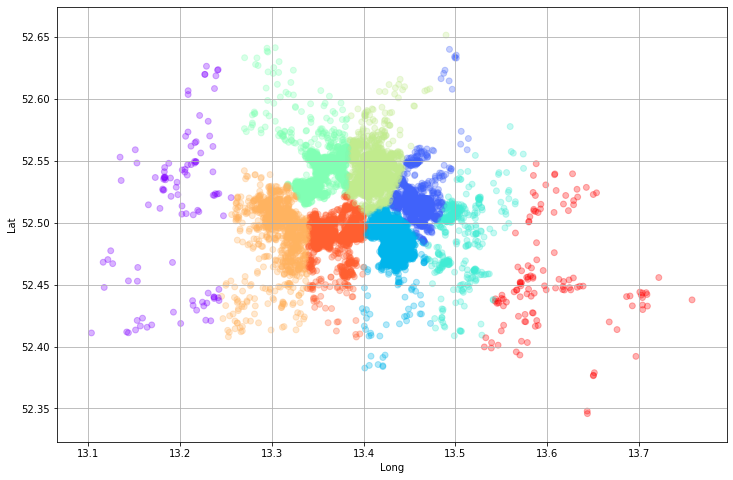

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(X_geo.iloc[:, 0], X_geo.iloc[:, 1], c=cluster_labels,  cmap=plt.cm.rainbow, s=35, linewidths=1, alpha=.3)
plt.xlabel('Long'), plt.ylabel('Lat')
plt.grid()

After training our model, if we would like to predict the clusters of future datapoints we can do so with the following:

In [36]:
X_val_geo = df_X_val.loc[:, ['longitude', 'latitude']]
val_labels = kmean.predict(X_val_geo)
val_labels[:7]

array([5, 3, 3, 6, 5, 6, 5], dtype=int32)

So here we can see the predictions of our validation set.

### Using this Our Model

Now at this point, if we think these labels may be useful.  We can simply add the cluster labels as a feature variable, and fit our random forest with it.

In [14]:
df_X_train.loc[:, 'geo_cluster'] = cluster_labels
df_X_val.loc[:, 'geo_cluster'] = val_labels

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(df_X_train, y_train)
rfr.score(df_X_val, y_val)

0.9378775409168372

And then we continue on with our feature selection techniques to see if adding the feature is actually helpful.